##### Analisis minat pelanggan berdasarkan tipe properti (by gender)

In [220]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [221]:
df = pd.read_csv('loan_customer.csv')
df.head(3)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE


#### cari data duplikat dan missing value

In [222]:
df.isnull().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [223]:
df.duplicated().sum()

1

#### drop data duplikat

In [224]:
df = df.drop_duplicates()

In [225]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,NaN,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,NaN,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,NaN,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,NaN,house,APPROVE


### handling missing value

In [226]:
#hanya menggunakan data dari loan_id, gender, dan property_type
data = ['loan_id', 'gender', 'property_type']
data = df[data]
data.isnull().sum()

loan_id           0
gender           13
property_type     1
dtype: int64

In [227]:
#hapus missing value
data=data.dropna(subset=['gender']).dropna(subset=['property_type'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 620
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   loan_id        606 non-null    object
 1   gender         606 non-null    object
 2   property_type  606 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB


## grouping

In [237]:
data_group = data.groupby(['gender', 'property_type'])['loan_id'].count().reset_index()
data_group

,gender,property_type,loan_id
0,Female,apartment,55
1,Female,house,34
2,Female,studio,24
3,Male,apartment,174
4,Male,house,168
5,Male,studio,151


<function matplotlib.pyplot.show(close=None, block=None)>

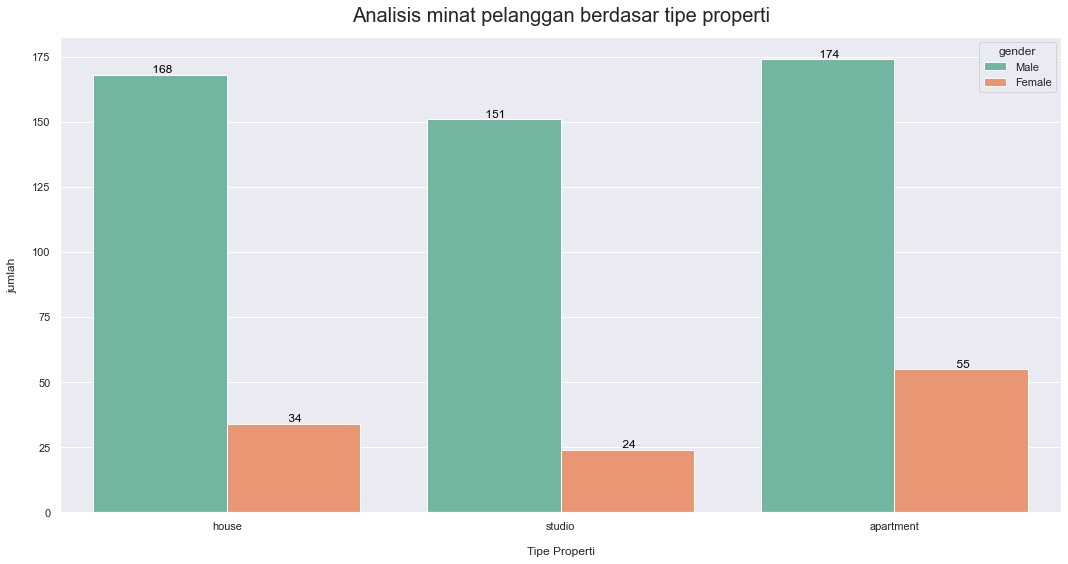

In [238]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1, figsize = (15,8))
sns.countplot(x='property_type', data=data, hue='gender', palette = "Set2")

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value: ,}'
    text_x = bar.get_x() + bar.get_width()/2
    text_y = bar.get_y()+bar_value
    bar_color= bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color = 'black', size=12)
    
ax.set_xlabel('Tipe Properti', labelpad=15)
ax.set_ylabel ('jumlah', labelpad =15)
ax.set_title('Analisis minat pelanggan berdasar tipe properti', pad=15, size=20)
plt.tight_layout()
plt.show

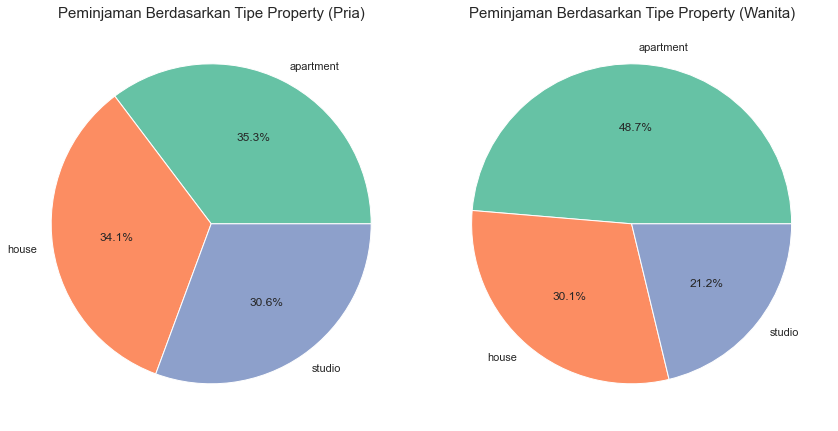

In [252]:
# Bagi data menjadi dua subset berdasarkan gender
data_female = data[data['gender'] == 'Female']
data_male = data[data['gender'] == 'Male']

# Hitung jumlah loan_id untuk setiap subset
data_female_grouped = data_female.groupby('property_type').size().reset_index(name='count')
data_male_grouped = data_male.groupby('property_type').size().reset_index(name='count')

# Buat dua diagram pie terpisah untuk masing-masing subset
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Diagram pie untuk gender male
axs[0].pie(data_male_grouped['count'], labels=data_male_grouped['property_type'], autopct='%1.1f%%', colors=sns.color_palette("Set2"))
axs[0].set_title('Peminjaman Berdasarkan Tipe Property (Pria)', size=15)

# Diagram pie untuk gender female
axs[1].pie(data_female_grouped['count'], labels=data_female_grouped['property_type'], autopct='%1.1f%%', colors=sns.color_palette("Set2"))
axs[1].set_title('Peminjaman Berdasarkan Tipe Property (Wanita)', size=15)

plt.tight_layout()
plt.show()
